In [1]:
import os
import pandas as pd
import torch
import umap
import numpy as np 
import re

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
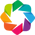

Loading BokehJS ...

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = sns.color_palette()

import hvplot.pandas
import re


import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import holoviews as hv 
import bokeh.io
import bokeh.plotting
import colorcet as cc

import scipy.stats as st


hv.extension('bokeh')
bokeh.io.output_notebook()

In [3]:
EMB_LAYER = 33

### Load annotations: 

In [46]:
fn_up_func = '../data/tests/uniprot-proteome_UP000001584.xlsx'
df_up_func = pd.read_excel(fn_up_func)
re_str = 'Rv\d\d\d\dc?'
list_rvids = [re.findall(re_str, str_temp)[0] for str_temp in df_up_func['Gene names']]
df_up_func['Rv_ID'] = list_rvids
df_up_func.sort_values(by = 'Rv_ID', inplace=True)
df_up_func['annot_int'] = [int(annot.split()[0]) for annot in df_up_func.Annotation]
df_up_func.shape

(3993, 16)

## Load embeddings: 

In [47]:
path_rep = '/home/ajinich/Dropbox/KyuRhee/unknown_function/unknown_redox/data/mohammed/up_mtb_reprs/'
list_fn = os.listdir(path_rep)
list_entry = [fn.split('.')[0] for fn in list_fn]
len(list_entry)

3909

In [48]:
df_up_func_missing = df_up_func[~df_up_func.Entry.isin(list_entry)].copy()

df_up_func = df_up_func[df_up_func.Entry.isin(list_entry)].copy()

df_up_func.shape, df_up_func_missing.shape

((3909, 16), (84, 16))

In [10]:
Xs_list = []
list_err = []
for entry in df_up_func.Entry.tolist():
    fn_full = os.path.join(path_rep, entry+'.pt')
    try:
        embs = torch.load(fn_full)
        Xs_list.append(embs['mean_representations'][EMB_LAYER])
    except:
        list_err.append(entry)
X = torch.stack(Xs_list, dim=0).numpy()

In [11]:
X.shape

(3909, 1280)

In [12]:
seed = 385
np.random.seed(seed)
u_emb = umap.UMAP(random_state = seed, min_dist = 0, n_components = 3).fit_transform(X)

In [13]:
# Add new UMAP data: 
df_up_func['u1'], df_up_func['u2'], df_up_func['u3'] = u_emb[:,0], u_emb[:,1], u_emb[:,2]

## Visualizations: 

### Load a list of genes and see where they fall:

In [14]:
def get_all_genes_from_folder(path_data):
    list_fn_data = [f for f in os.listdir(path_data) if '.xlsx' in f]
    list_rvid_all = []
    for fn_data in list_fn_data:
        fn_data_full = os.path.join(path_data, fn_data)
        list_rvid = pd.read_excel(fn_data_full).Rv_ID.tolist()
        list_rvid_all += list_rvid
    list_rvid_all=list(set(list_rvid_all))
    list_rvid_all.sort()
    return list_rvid_all

In [65]:
fn_rvid_list = '../data/annotations/SDR_IB_vs_soluble_mapping.xlsx'
list_rvid = pd.read_excel(fn_rvid_list)['Rv_ID'].tolist()

In [15]:
path_data = '/home/ajinich/Dropbox/KyuRhee/unknown_function/unknown_redox/figs/GLS_TnSeq_promising/positive_controls/PDIM/'
list_rvid = get_all_genes_from_folder(path_data)

In [35]:
# rvid = ['Rv3791',
# 'Rv0927c',
# 'Rv1928c',
# 'Rv2509',
# 'Rv1543',
# 'Rv3530c',
# 'Rv1483',
# 'Rv2073c']
list_rvid = ['Rv1901', 'Rv0413']
df_rvid = df_up_func[df_up_func.Rv_ID.isin(list_rvid)].copy()
df_rvid.shape

(2, 19)

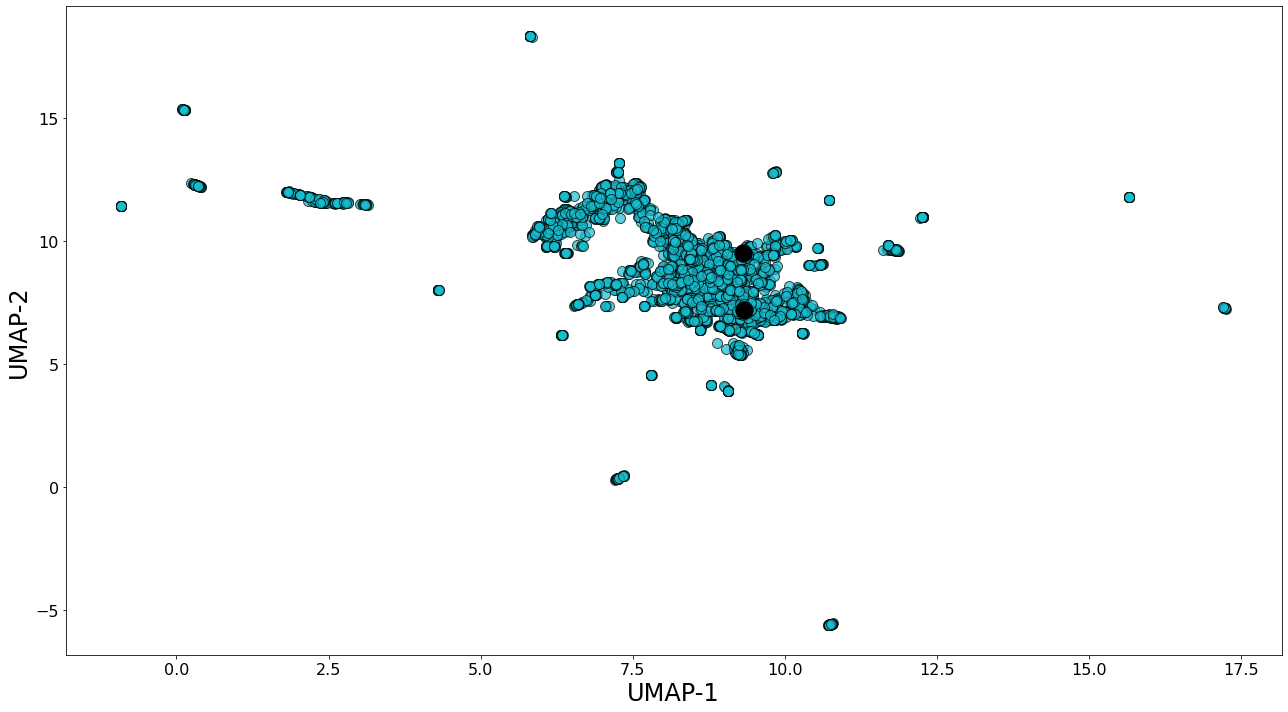

In [36]:
plt.figure(figsize=(18,10))

plt.scatter(df_up_func.u1, df_up_func.u2, s = 100, color = cols[-1], edgecolors='k', alpha = 0.7)
plt.scatter(df_rvid.u1, df_rvid.u2, s = 300, color = 'k', edgecolors='k', alpha = 1)


plt.xlabel('UMAP-1', fontsize = 24 )
plt.ylabel('UMAP-2', fontsize = 24 )
xt = plt.xticks(fontsize = 16)
yt = plt.yticks(fontsize = 16)

plt.tight_layout()


In [35]:
df_up_func.columns

Index(['Entry', 'Entry name', 'Status', 'Protein names', 'Gene names',
       'Organism', 'Length', 'Annotation', 'Rhea ID', 'EC number',
       'Catalytic activity', 'ChEBI', 'Sequence', 'Function [CC]', 'Rv_ID',
       'annot_int', 'u1', 'u2', 'u3'],
      dtype='object')

In [25]:
df_up_func.hvplot.scatter(x="u1", y="u2", padding=0.05, width = 1500, height = 1000, size = 100, alpha = 0.7, 
                     hover_cols=["Rv_ID", "Gene names", "Entry", "Protein names", "Annotation"], line_color='k', c="Annotation")


:Scatter   [u1]   (u2,Annotation,Rv_ID,Gene names,Entry,Protein names)

In [32]:
list_rvid = ['Rv1901', 'Rv0413']
df_test = df_up_func.copy()
df_test['is_gene'] = df_test.Rv_ID.isin(list_rvid)

In [33]:
colors_sns = sns.color_palette('colorblind')
colors_sns

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [34]:
df_test.hvplot.scatter(x="u1", y="u2", padding=0.05, width = 1500, height = 1000, size = 100, alpha = 0.7, 
                     hover_cols=["Rv_ID", "Gene names", "Entry", "Protein names", "Annotation"], line_color='k', c="is_gene", cmap=['white', 'blue'])


:Scatter   [u1]   (u2,is_gene,Rv_ID,Gene names,Entry,Protein names,Annotation)

## Other: 

In [52]:
def df_to_fasta(df, file_out_name):
    
    with open(file_out_name, 'w') as fout:
        
        for index, row in df.iterrows():
            fout.write( '>'+row['Entry']+'\n' )
            fout.write( row['Sequence']+'\n' )
            
    

In [53]:
fout = '../data/annotations/mtb_pending.fasta'
df_to_fasta(df_up_func_missing, fout)


finish running esm on the rest of the Mtb genome (sequence length < 1024)